#dot로 시도

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
path1='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/newdata_all_0818.xlsx'

In [4]:
path2='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/vector/newdata_all_0818_ver1_final.xlsx'

##올바르지 않은

In [5]:
data = pd.read_excel(path1)
pick = pd.read_excel(path2)

In [6]:
data

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,y,image
0,0.813085,0.846067,-0.000055,0.824422,0.770610,-0.124702,0.797283,0.650218,-0.159701,0.742439,0.556123,-0.170803,0.691368,0.466948,-0.182419,0.817069,0.471548,-0.059792,0.738878,0.411966,-0.103471,0.682167,0.420989,-0.139112,0.639966,0.446352,-0.155034,0.783102,0.509549,-0.013305,0.703507,0.470197,-0.073678,0.663062,0.534278,-0.134101,0.635184,0.590695,-0.168920,0.753243,0.552782,0.023123,0.683966,0.563757,-0.054008,0.665996,0.650417,-0.105708,0.658083,0.712052,-0.124142,0,not_correct10.MP4_000002.243.jpg
1,0.811608,0.900154,0.000049,0.800232,0.803997,-0.128185,0.769821,0.692153,-0.163109,0.714997,0.601138,-0.173176,0.667249,0.523414,-0.179355,0.803990,0.504725,-0.065811,0.713653,0.483295,-0.111253,0.661599,0.532235,-0.147132,0.634616,0.574219,-0.165844,0.768074,0.530350,-0.011554,0.684327,0.507863,-0.067704,0.649618,0.593538,-0.111933,0.637922,0.656537,-0.130769,0.737973,0.567718,0.029811,0.662422,0.575084,-0.043147,0.639473,0.667215,-0.085680,0.635148,0.724634,-0.097661,0,not_correct10.MP4_000004.040.jpg
2,0.804972,0.898247,0.000036,0.795059,0.818508,-0.124139,0.766665,0.708822,-0.161453,0.715835,0.615361,-0.176281,0.669516,0.537159,-0.190632,0.802102,0.513931,-0.062936,0.719684,0.480097,-0.111553,0.665456,0.517717,-0.152546,0.630459,0.559995,-0.172420,0.769932,0.540662,-0.013439,0.687925,0.511267,-0.074293,0.648063,0.590128,-0.122476,0.627498,0.657720,-0.142231,0.739783,0.577900,0.023670,0.667724,0.580225,-0.050296,0.643426,0.669124,-0.086262,0.632836,0.729143,-0.093261,0,not_correct10.MP4_000004.240.jpg
3,0.810611,0.890062,0.000032,0.797697,0.811081,-0.132050,0.766151,0.704937,-0.172678,0.712006,0.602737,-0.188355,0.662580,0.521790,-0.203335,0.800948,0.506245,-0.075835,0.706428,0.475711,-0.123942,0.648628,0.529975,-0.159660,0.616530,0.582503,-0.175144,0.770626,0.526458,-0.020276,0.675969,0.510031,-0.075999,0.629624,0.605371,-0.124830,0.606849,0.681861,-0.145291,0.742881,0.562696,0.021927,0.659005,0.577648,-0.049330,0.623684,0.669649,-0.091005,0.604884,0.731458,-0.106125,0,not_correct10.MP4_000004.440.jpg
4,0.813915,0.895303,0.000028,0.799781,0.789586,-0.113865,0.765924,0.675086,-0.142654,0.708385,0.585417,-0.154692,0.655782,0.504408,-0.175345,0.784996,0.497014,-0.041157,0.704009,0.459128,-0.076921,0.649163,0.475977,-0.112614,0.611063,0.508673,-0.131428,0.751889,0.537486,0.007954,0.670158,0.521544,-0.035843,0.624126,0.579177,-0.092226,0.595052,0.639403,-0.118748,0.725035,0.583591,0.047228,0.650328,0.600061,-0.012425,0.626391,0.679714,-0.067126,0.612227,0.739808,-0.089580,0,not_correct10.MP4_000004.640.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.845585,0.939924,-0.000010,0.834245,0.766973,-0.124223,0.783395,0.594559,-0.147035,0.706249,0.462637,-0.155887,0.648856,0.322473,-0.164343,0.806302,0.362722,0.003236,0.713503,0.248290,-0.044954,0.638528,0.283239,-0.116305,0.588820,0.372963,-0.166686,0.757798,0.432758,0.052386,0.657530,0.320263,0.000556,0.576895,0.375720,-0.103096,0.525801,0.457907,-0.176403,0.714370,0.510993,0.089071,0.619689,0.440084,0.016014,0.546414,0.505925,-0.101369,0.502023,0.586357,-0.173579,1,correct4.mp4_000005.383.jpg
1184,0.846682,0.942074,0.000018,0.841494,0.766714,-0.124047,0.789954,0.597155,-0.146498,0.710350,0.473680,-0.154309,0.650647,0.342139,-0.158929,0.806473,0.373347,-0.000659,0.721333,0.255809,-0.051297,0.648449,0.284207,-0.124670,0.599384,0.372669,-0.173639,0.751615,0.441638,0.046504,0.659921,0.317437,-0.003432,0.579589,0.357693,-0.105593,0.525711,0.433388,-0.177965,0.705788,0.521830,0.080786,0.614481,0.446506,0.011814,0.538532,0.503794,-0.110959,0.487695,0.579054,-0.190390,1,correct4.m

In [7]:
pick= pick[["d_ratio","약중, 중검 sin차"]]

In [8]:
data = pd.concat([data,pick],axis=1)

In [9]:
data

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,y,image,d_ratio,"약중, 중검 sin차"
0,0.813085,0.846067,-0.000055,0.824422,0.770610,-0.124702,0.797283,0.650218,-0.159701,0.742439,0.556123,-0.170803,0.691368,0.466948,-0.182419,0.817069,0.471548,-0.059792,0.738878,0.411966,-0.103471,0.682167,0.420989,-0.139112,0.639966,0.446352,-0.155034,0.783102,0.509549,-0.013305,0.703507,0.470197,-0.073678,0.663062,0.534278,-0.134101,0.635184,0.590695,-0.168920,0.753243,0.552782,0.023123,0.683966,0.563757,-0.054008,0.665996,0.650417,-0.105708,0.658083,0.712052,-0.124142,0,not_correct10.MP4_000002.243.jpg,0.905420,0.319156
1,0.811608,0.900154,0.000049,0.800232,0.803997,-0.128185,0.769821,0.692153,-0.163109,0.714997,0.601138,-0.173176,0.667249,0.523414,-0.179355,0.803990,0.504725,-0.065811,0.713653,0.483295,-0.111253,0.661599,0.532235,-0.147132,0.634616,0.574219,-0.165844,0.768074,0.530350,-0.011554,0.684327,0.507863,-0.067704,0.649618,0.593538,-0.111933,0.637922,0.656537,-0.130769,0.737973,0.567718,0.029811,0.662422,0.575084,-0.043147,0.639473,0.667215,-0.085680,0.635148,0.724634,-0.097661,0,not_correct10.MP4_000004.040.jpg,0.846204,0.247713
2,0.804972,0.898247,0.000036,0.795059,0.818508,-0.124139,0.766665,0.708822,-0.161453,0.715835,0.615361,-0.176281,0.669516,0.537159,-0.190632,0.802102,0.513931,-0.062936,0.719684,0.480097,-0.111553,0.665456,0.517717,-0.152546,0.630459,0.559995,-0.172420,0.769932,0.540662,-0.013439,0.687925,0.511267,-0.074293,0.648063,0.590128,-0.122476,0.627498,0.657720,-0.142231,0.739783,0.577900,0.023670,0.667724,0.580225,-0.050296,0.643426,0.669124,-0.086262,0.632836,0.729143,-0.093261,0,not_correct10.MP4_000004.240.jpg,0.847929,0.197722
3,0.810611,0.890062,0.000032,0.797697,0.811081,-0.132050,0.766151,0.704937,-0.172678,0.712006,0.602737,-0.188355,0.662580,0.521790,-0.203335,0.800948,0.506245,-0.075835,0.706428,0.475711,-0.123942,0.648628,0.529975,-0.159660,0.616530,0.582503,-0.175144,0.770626,0.526458,-0.020276,0.675969,0.510031,-0.075999,0.629624,0.605371,-0.124830,0.606849,0.681861,-0.145291,0.742881,0.562696,0.021927,0.659005,0.577648,-0.049330,0.623684,0.669649,-0.091005,0.604884,0.731458,-0.106125,0,not_correct10.MP4_000004.440.jpg,0.606794,0.240847
4,0.813915,0.895303,0.000028,0.799781,0.789586,-0.113865,0.765924,0.675086,-0.142654,0.708385,0.585417,-0.154692,0.655782,0.504408,-0.175345,0.784996,0.497014,-0.041157,0.704009,0.459128,-0.076921,0.649163,0.475977,-0.112614,0.611063,0.508673,-0.131428,0.751889,0.537486,0.007954,0.670158,0.521544,-0.035843,0.624126,0.579177,-0.092226,0.595052,0.639403,-0.118748,0.725035,0.583591,0.047228,0.650328,0.600061,-0.012425,0.626391,0.679714,-0.067126,0.612227,0.739808,-0.089580,0,not_correct10.MP4_000004.640.jpg,0.800791,0.165280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.845585,0.939924,-0.000010,0.834245,0.766973,-0.124223,0.783395,0.594559,-0.147035,0.706249,0.462637,-0.155887,0.648856,0.322473,-0.164343,0.806302,0.362722,0.003236,0.713503,0.248290,-0.044954,0.638528,0.283239,-0.116305,0.588820,0.372963,-0.166686,0.757798,0.432758,0.052386,0.657530,0.320263,0.000556,0.576895,0.375720,-0.103096,0.525801,0.457907,-0.176403,0.714370,0.510993,0.089071,0.619689,0.440084,0.016014,0.546414,0.505925,-0.101369,0.502023,0.586357,-0.173579,1,correct4.mp4_000005.383.jpg,1.230190,0.053147
1184,0.846682,0.942074,0.000018,0.841494,0.766714,-0.124047,0.789954,0.597155,-0.146498,0.710350,0.473680,-0.154309,0.650647,0.342139,-0.158929,0.806473,0.373347,-0.000659,0.721333,0.255809,-0.051297,0.648449,0.284207,-0.124670,0.599384,0.372669,-0.173639,0.751615,0.441638,0.046504,0.659921,0.317437,-0.003432,0.579589,0.357693,-0.105593,0.525711,0.4

In [10]:
#data.drop(['x_0','y_0','z_0','x_1','y_1','z_1','x_2','y_2','z_2','x_5','y_5','z_5','x_9','y_9','z_9','x_13','y_13','z_13'],axis=1, inplace=True)

In [11]:
#data.drop(['z_0','z_1','z_2','z_3','z_4','z_5','z_6','z_7','z_8','z_9','z_10','z_11','z_12','x_13','z_14','z_15','z_16'],axis=1, inplace=True)

In [12]:
vector0= data[data['y']==0]

In [13]:
len(vector0)

458

In [14]:
vector0.drop(['y','image'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


정규화

In [15]:
#RobustScaler: outlier 많은 경우 -> boxplot 보고 결정
#StandardScaler: 거리 기반 알고리즘
#MinMaxScaler: gradient descent 알고리즘

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()
vector0_=scaler.fit_transform(vector0)

In [17]:
vector0_

array([[ 0.10856317,  0.49403856, -0.87295115, ..., -1.43811681,
         0.05021796,  0.46990976],
       [ 0.09869244,  0.9746825 ,  1.10199132, ..., -1.06868135,
        -0.06266647,  0.14472333],
       [ 0.05432651,  0.95773955,  0.84877742, ..., -1.0073006 ,
        -0.05937835, -0.08281795],
       ...,
       [-0.95297603,  0.85406321,  1.40200671, ..., -0.53240204,
         0.73373984,  0.39554853],
       [-0.94285547,  0.58052246, -1.46554541, ...,  0.14219588,
        -0.16345561, -0.85056605],
       [-0.88033389,  0.64940767, -1.02507076, ..., -0.0229794 ,
         0.81690844, -0.94403109]])

##올바른

In [18]:
vector1= data[data['y']==1]

In [19]:
vector1.drop(['y','image'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()
vector1_=scaler.fit_transform(vector1)

In [21]:
vector1_

array([[ 0.12584687, -0.7160803 , -0.63468727, ..., -0.23526876,
         2.18615481,  1.21865171],
       [ 0.18390533, -0.71363211, -0.56514514, ...,  0.12647374,
         0.15735845, -0.53257018],
       [ 0.21766393, -0.88087196, -0.54208624, ..., -0.15877544,
         0.89695193,  0.18785666],
       ...,
       [ 0.47045663,  0.83326738,  0.24258049, ..., -0.87157749,
         0.60104758, -0.6340985 ],
       [ 0.49557418,  0.86219595,  0.4079727 , ..., -1.02158136,
         0.87727336, -0.57775202],
       [ 0.47770884,  0.77862453,  0.91920991, ..., -1.02100405,
         0.68045126, -0.65984476]])

#LSTM

데이터셋 분리

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
vector0 = np.array(vector0_)
vector1 = np.array(vector1_)
len(vector0), len(vector1)
vector0.shape, vector1.shape

((458, 53), (730, 53))

In [24]:
#수정필요,,,?

x0_train = vector0[:int(0.7*len(vector0))]
x0_test = vector0[int(0.7*len(vector0)):]

In [25]:
x0_train.shape, x0_test.shape

((320, 53), (138, 53))

In [26]:
x1_train = vector1[:int(0.7*len(vector1))]
x1_test = vector1[int(0.7*len(vector1)):]

In [27]:
x1_train.shape, x1_test.shape

((510, 53), (220, 53))

비정상 :1, 정상: 0

In [28]:
x0_test_tot = np.hstack((x0_test, np.ones(x0_test.shape[0]).reshape(-1,1)))
x1_test_tot = np.hstack((x1_test, np.zeros(x1_test.shape[0]).reshape(-1,1)))
test_tot = np.vstack((x0_test_tot, x1_test_tot))

In [29]:
x_test, x_valid, y_test, y_valid = train_test_split(test_tot[:,:-1], test_tot[:,-1], test_size=0.3)

In [30]:
print(x_test.shape, x_valid.shape, y_test.shape)

(250, 53) (108, 53) (250,)


데이터 차원 변경

In [31]:
x1_train =x1_train.reshape(x1_train.shape[0],1,x1_train.shape[1])
x_test =x_test.reshape(x_test.shape[0],1,x_test.shape[1])
x_valid =x_valid.reshape(x_valid.shape[0],1,x_valid.shape[1])

In [32]:
print(x1_train.shape,x_test.shape,x_valid.shape)

(510, 1, 53) (250, 1, 53) (108, 1, 53)


신경망 구축

In [33]:
from keras import regularizers
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector

In [34]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    # return_sequences 가 True면 각 time_steps의 셀이 모두 출력으로 내보냄 , False 면 최종 셀만 출력으로 내보냄
    L1 = LSTM(32, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(16, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(16, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(32, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [35]:
model = autoencoder_model(x1_train)
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 53)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 32)             11008     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 16)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 16)             2112      
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 32)             6272      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 53)             1749  

In [36]:
model = autoencoder_model(x1_train)
model.compile(optimizer='adam',loss='mse')

In [37]:
epochs=25
batch_size=5
callbacks=[EarlyStopping(monitor='val_loss',patience=5)]

history = model.fit(x1_train, x1_train, epochs=epochs, batch_size= batch_size,callbacks = callbacks, validation_split=0.05).history

Epoch 1/25
97/97 [==============================] - 6s 18ms/step - loss: 0.4799 - val_loss: 0.4246
Epoch 2/25
97/97 [==============================] - 1s 13ms/step - loss: 0.3169 - val_loss: 0.1121
Epoch 3/25
97/97 [==============================] - 1s 12ms/step - loss: 0.1892 - val_loss: 0.0612
Epoch 4/25
97/97 [==============================] - 1s 12ms/step - loss: 0.1200 - val_loss: 0.0417
Epoch 5/25
97/97 [==============================] - 1s 12ms/step - loss: 0.0975 - val_loss: 0.0351
Epoch 6/25
97/97 [==============================] - 1s 13ms/step - loss: 0.0878 - val_loss: 0.0319
Epoch 7/25
97/97 [==============================] - 1s 13ms/step - loss: 0.0817 - val_loss: 0.0283
Epoch 8/25
97/97 [==============================] - 1s 13ms/step - loss: 0.0774 - val_loss: 0.0277
Epoch 9/25
97/97 [==============================] - 1s 13ms/step - loss: 0.0724 - val_loss: 0.0280
Epoch 10/25
97/97 [==============================] - 1s 13ms/step - loss: 0.0665 - val_loss: 0.0269
Epoch 11/

In [38]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

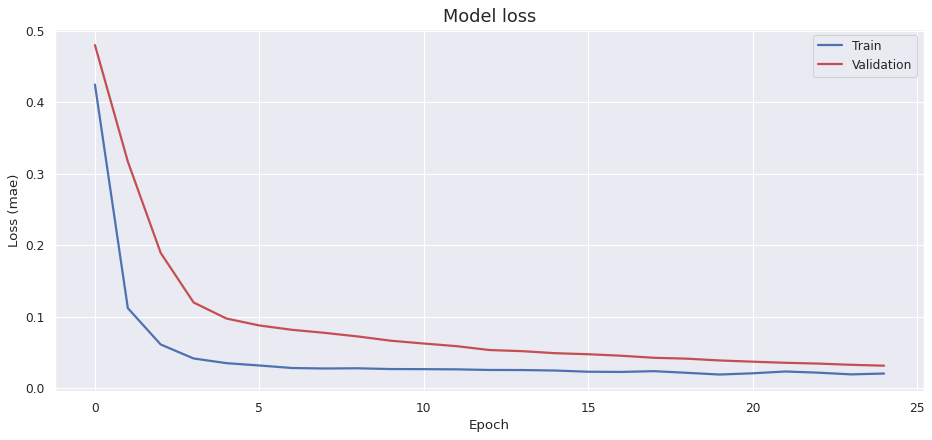

In [39]:
# 학습 손실 시각화
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['val_loss'], 'b', label='Train', linewidth=2)
ax.plot(history['loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [40]:
from sklearn import metrics

precision:  0.6888888888888889 , recall:  0.6888888888888889
threshold:  0.2264170625640536


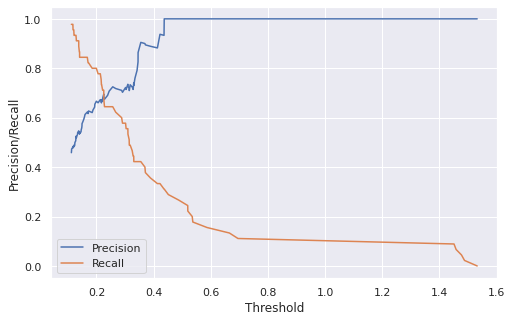

In [41]:
#검증 데이터 입력
predictions_3d = model.predict(x_valid)
predictions = predictions_3d.reshape(predictions_3d.shape[0], predictions_3d.shape[2])
x_valid_ = x_valid.reshape(x_valid.shape[0], x_valid.shape[2])

#재구성 손실 값 도출
mse = np.mean(np.power(x_valid_ - predictions, 2), axis = 1)

error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class': y_valid})

precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

#모델 최적의 threshold 값 찾기
best_cnt_dic = abs(precision_rt - recall_rt)
threshold_fixed = threshold_rt[np.argmin(best_cnt_dic)]
print('precision: ', precision_rt[np.argmin(best_cnt_dic)], ', recall: ', recall_rt[np.argmin(best_cnt_dic)])
print('threshold: ', threshold_fixed)

plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label = 'Precision')
plt.plot(threshold_rt, recall_rt[1:], label = 'Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

모델 성능 평가

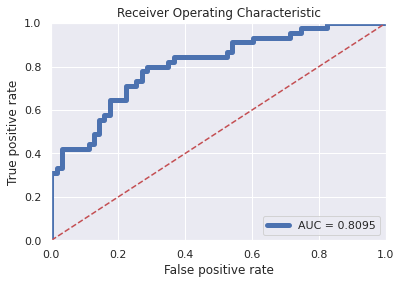

In [42]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_valid, mse)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc, linewidth=5)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([-0.001,1])
plt.ylim([0,1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

accuracy:  [0.808]


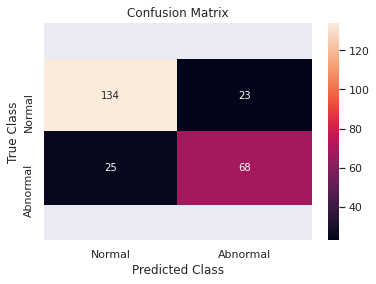

In [43]:
test_predictions_3d = model.predict(x_test)
test_predictions = test_predictions_3d.reshape(test_predictions_3d.shape[0], test_predictions_3d.shape[2])
x_test_ = x_test.reshape(x_test.shape[0], x_test.shape[2])
mse = np.mean(np.power(x_test_ - test_predictions, 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': y_test})

pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]
conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)

accuracy = (conf_matrix[0][0]+ conf_matrix[1][[1]])/conf_matrix.sum()
print('accuracy: ',accuracy)

sns.heatmap(conf_matrix, xticklabels=['Normal','Abnormal'], yticklabels=['Normal', 'Abnormal'], annot=True, fmt='d', annot_kws={'size':10})
b,t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

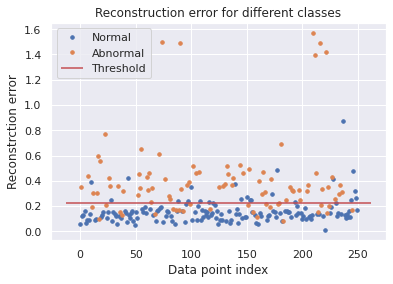

In [44]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
  ax.plot(group.index, group.Reconstruction_error, marker = 'o', ms=3.5, linestyle='',
          label='Abnormal' if name ==1 else 'Normal')

ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors ='r', zorder=100, label ='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")  
plt.ylabel("Reconstrction error")
plt.xlabel("Data point index")
plt.show()

모든 점 + feature \
auc: 0.79 accuracy: 0.788 => minmax \
auc: 0.89 accuracy: 0.8 => robust \
auc: 0.66 accuracy: 0.711 => standard

일부 점 + feature \
auc: 0.90 accuracy: 0.69 

z값 제외 + feature \
auc: 0.81 accuracy: 0.724 => robust

모든 점 \
auc: 0.83 accuracy: 0.74 => robust